In [86]:
import numpy as np
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt 
from scipy.integrate import fixed_quad

In [87]:
Vm = 20.0      # Amplitude da tensão (V)
Vd = 0.7       # Queda de tensão direta do diodo (V)
R = 100.0      # Resistência da carga (Ohm)
rd = 5.0       # Resistência dinâmica do diodo (Ohm)
alpha = 1.0    # Fator de não linearidade

theta_c = np.arcsin(Vd / Vm)

Text(0, 0.5, '$i(t)$')

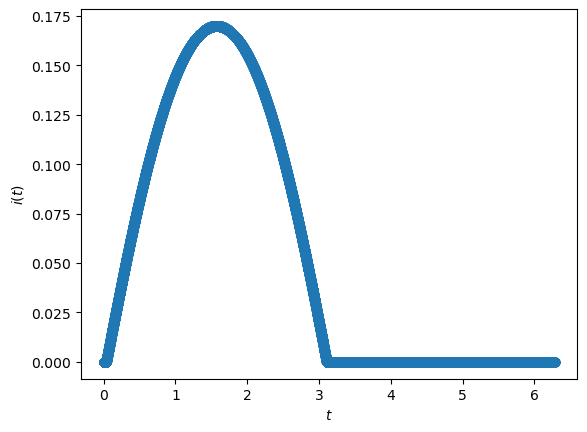

In [ ]:
a, b = 0.0, 2*np.pi

theta = np.linspace(a, b, 100001)  # discretização do intervalo

def i_func(theta):
    cond = np.sin(theta) >= Vd / Vm # Condição para a corrente não zerar
    return np.where(cond,
                    (Vm * np.sin(theta) - Vd) / (R + rd * np.exp(alpha * np.sin(theta))),
                    0.0)

y = i_func(theta)
plt.plot(theta,y,'o')
plt.xlabel('$t$')
plt.ylabel('$i(t)$')

In [89]:
T = cumulative_trapezoid(y, theta, initial=0)[-1] # pega último valor, já que é cumulativa

print(f'Integral por Trapézio = {T:6f}')

Integral por Trapézio = 0.340000


In [90]:

I_gauss_total = fixed_quad(i_func, a, b, n=100)[0] 

print(f'Integral por Quadratura Gaussiana: {I_gauss_total:6f}')


Integral por Quadratura Gaussiana: 0.339957
